In [1]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [17]:
x = df[['mpg','acceleration']]

In [18]:
polynomial_transform = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
polynomial_transform.fit(x)
polynomial_transform.transform(x)

array([[  18.  ,   12.  ,  324.  ,  216.  ,  144.  ],
       [  15.  ,   11.5 ,  225.  ,  172.5 ,  132.25],
       [  18.  ,   11.  ,  324.  ,  198.  ,  121.  ],
       ...,
       [  32.  ,   11.6 , 1024.  ,  371.2 ,  134.56],
       [  28.  ,   18.6 ,  784.  ,  520.8 ,  345.96],
       [  31.  ,   19.4 ,  961.  ,  601.4 ,  376.36]])

## Data Diamonds


In [19]:
df_diamond = sns.load_dataset('diamonds')
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


1- Creer une variable volume

In [20]:
volume = df_diamond['x']*df_diamond['y']*df_diamond['z']
df_diamond['volume'] = volume

2. Créez une variable qui donne le Rapport carat/volume. En effet Il pourrait être utile de créer une variable qui montre la densité apparente du diamant en comparant le poids (carat) au volume (volume). Les diamants avec une densité apparente pourraient indiquer des caractéristiques spécifiques qui influencent le prix.

In [21]:
density_diamond = df_diamond['carat']/volume
df_diamond['density'] = density_diamond

4. La variable Depth est elle-même construite sur la base des variables x, y, et z. Saurez-vous trouver laquelle ?

In [22]:
Depth = df_diamond['z']/(df_diamond['x']/2+df_diamond['y']/2)*100

5. Avez-vous d'autres idées de Feature Engineering ?

In [23]:
# Normalisation de la variable table et du prix
Table_norm = df_diamond['table']/(df_diamond['x']/2+df_diamond['y']/2)*100
Prise_norm = df_diamond['price']/df_diamond['carat']
# Approximation de l'air laterale
Air_Lateral = np.pi*(df_diamond['x']+df_diamond['y'])*df_diamond['z']

6. Utilisez les caractéristiques polynomiales pour tester des combinaisons de degré 2 et dites s'il existe des variables intéressantes.

<Axes: xlabel='price', ylabel='z'>

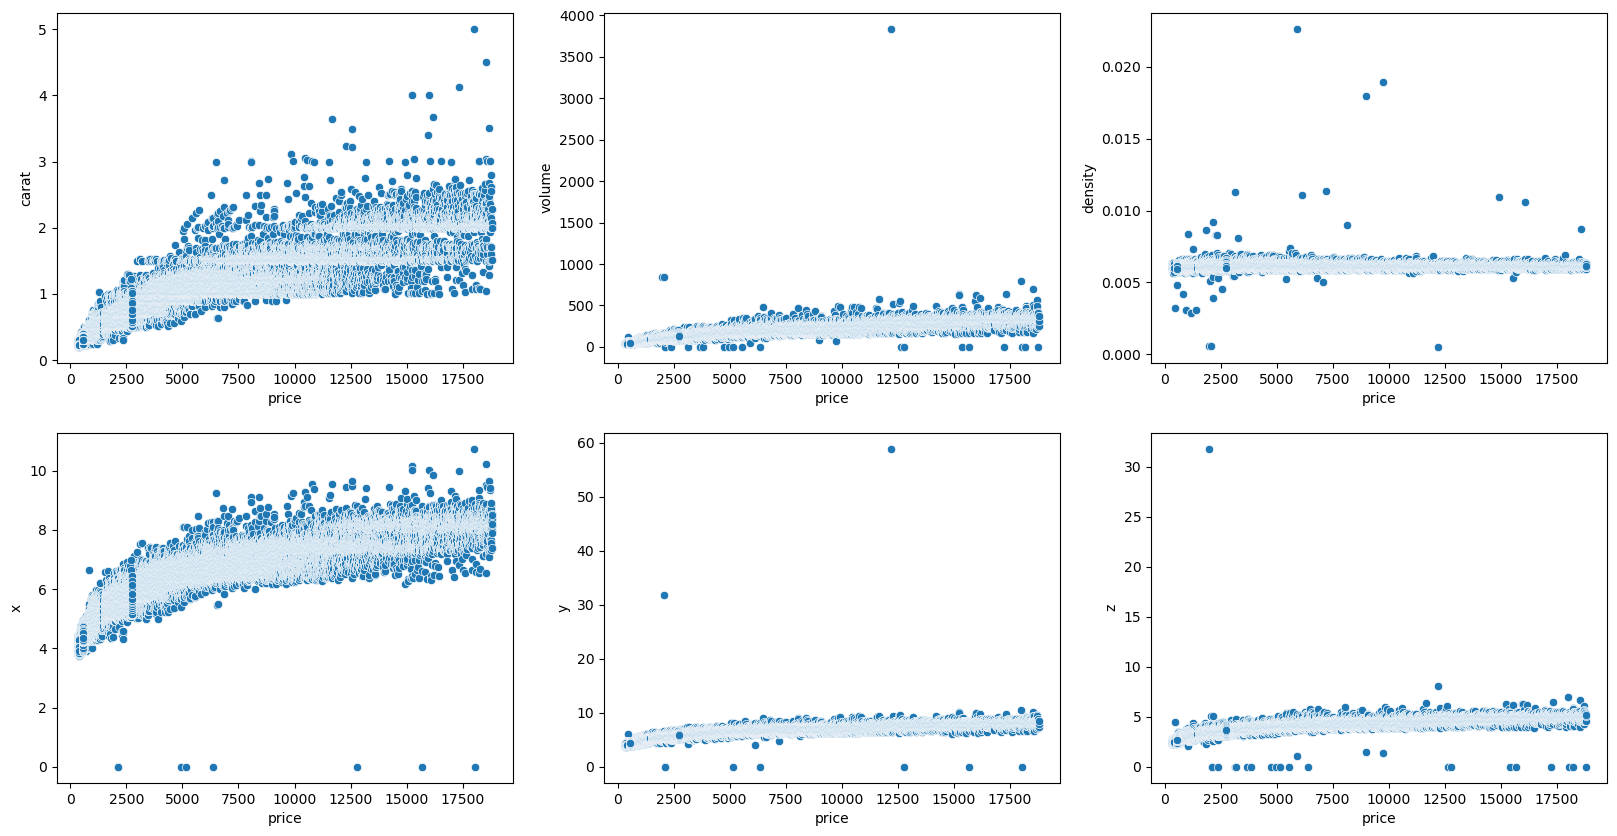

In [24]:
fig , ax =plt.subplots(2,3, figsize = (20,10))
sns.scatterplot(df_diamond, x='price', y ='carat', ax = ax[0][0])
sns.scatterplot(df_diamond, x='price', y ='volume', ax = ax[0][1])
sns.scatterplot(df_diamond, x='price', y ='density', ax = ax[0][2])
sns.scatterplot(df_diamond, x='price', y ='x', ax = ax[1][0])
sns.scatterplot(df_diamond, x='price', y ='y', ax = ax[1][1])
sns.scatterplot(df_diamond, x='price', y ='z', ax = ax[1][2])

<Axes: xlabel='price', ylabel='carat'>

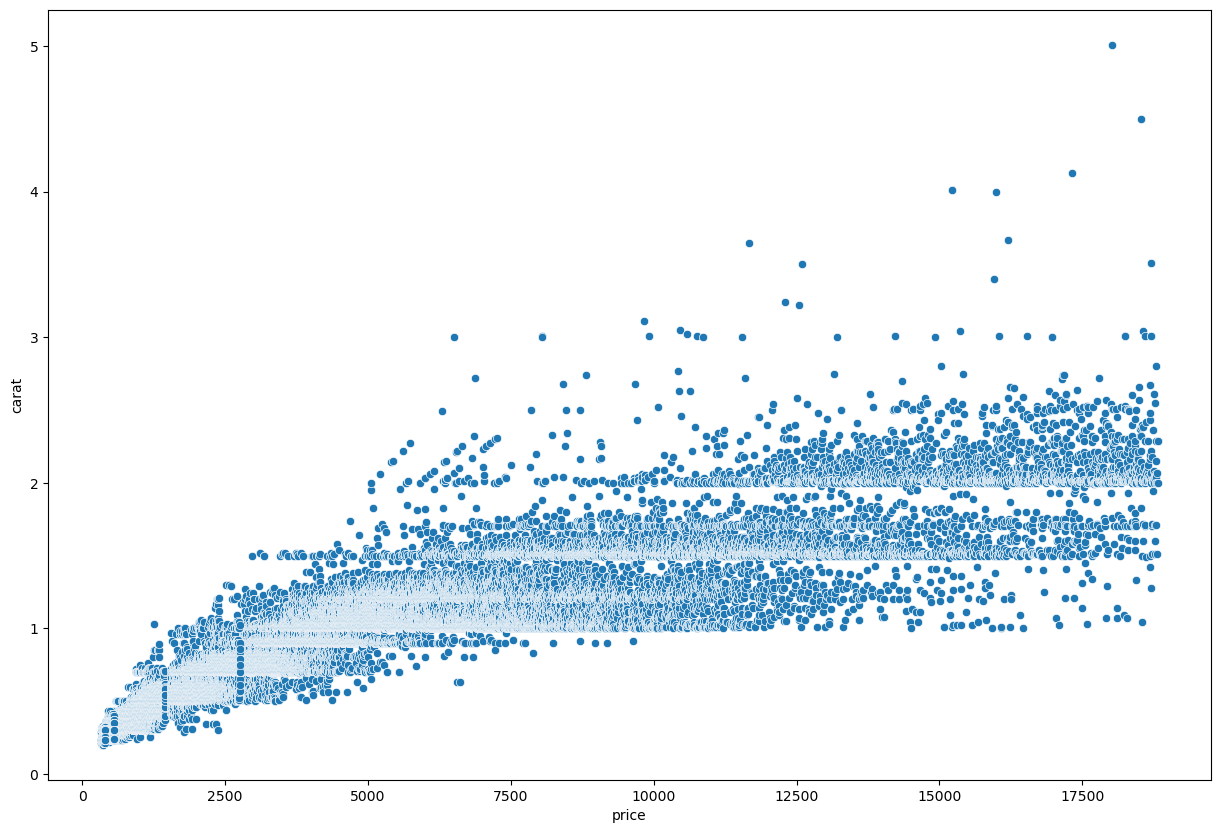

In [25]:

plt.figure(figsize=(15,10))
sns.scatterplot(df_diamond, x='price', y ='carat')